# ネットワーク構造の分析

## サブグループ
- ある程度の大きさを持つネットワークは，その内部に他のグループと区別できるような形の小さなネットワークを形成していることがある．このようなネットワークを**サブグループ**(sub-group)という．
- 例): 社会集団で言えば，政党内部に形成される派閥などがこれに当たる．
    - 時の長期政権である第2次安倍内閣は岸田派，二階派，菅派，麻生派などが有名ですよね．
- ネットワーク内部のサブグループを**サブグラフ**という．
- 今回は，このサブグラフを見つける方法を見ていく．


### 連結成分
- ネットワーク内部のサブグラフが最もはっきりと発見できる形は，グラフがいくつかの部分に分離している時である．
    - この時，分離したそれぞれの部分を**連結成分**(connected component)という．
    - 個人的には, サブグラフといった方が良さげではあるが，グラフ理論の言葉だと思うので慣習に従う．
- まず，以下の図ではグラフはそれぞれ頂点数が4, 3, 2, 1のグラフに分離している．この時，最も大きい連結成分を**最大連結成分**という．
- snaパッケージには連結成分を調べる関数である，components()関数があり，これは連結成分の数を返す．

In [2]:
A <- matrix(c(
0,1,1,1,0,0,0,0,0,0, 
1,0,1,0,0,0,0,0,0,0, 
1,1,0,0,0,0,0,0,0,0, 
1,0,0,0,0,0,0,0,0,0, 
0,0,0,0,0,1,1,0,0,0, 
0,0,0,0,1,0,1,0,0,0, 
0,0,0,0,1,1,0,0,0,0, 
0,0,0,0,0,0,0,0,1,0, 
0,0,0,0,0,0,0,1,0,0, 
0,0,0,0,0,0,0,0,0,0),
nrow = 10, ncol = 10, byrow = TRUE)

library(sna)

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following object is masked from ‘package:base’:

    order


Loading required package: network

network: Classes for Relational Data
Version 1.15 created on 2019-04-01.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




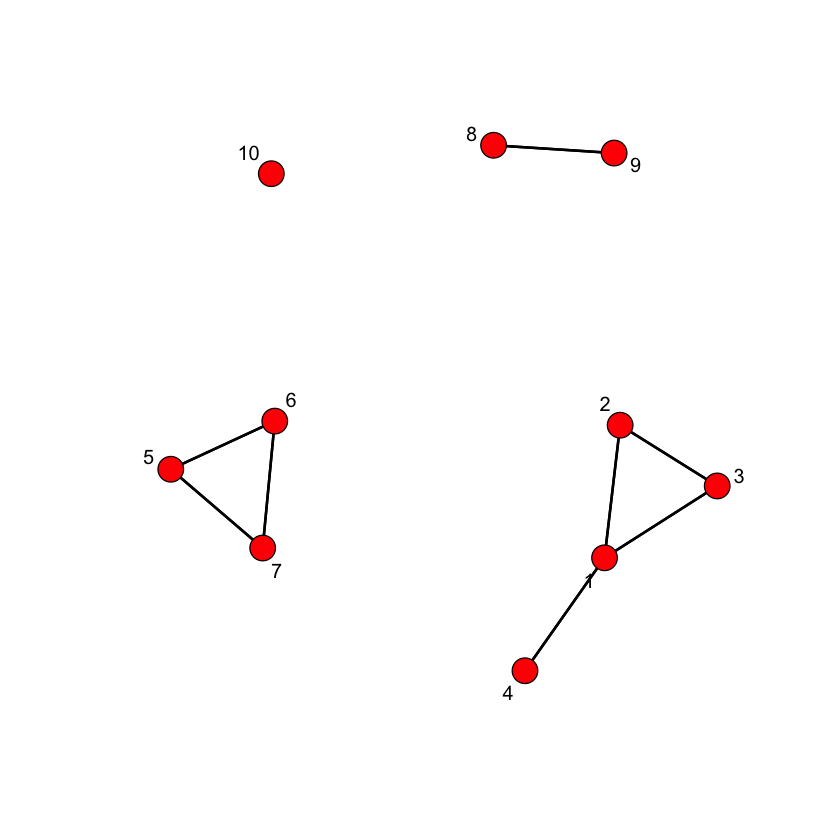

In [6]:
gplot(A, gmode = "graph", displaylabels = TRUE)

In [4]:
components(A)

Node 1, Reach 4, Total 4
Node 2, Reach 4, Total 8
Node 3, Reach 4, Total 12
Node 4, Reach 4, Total 16
Node 5, Reach 3, Total 19
Node 6, Reach 3, Total 22
Node 7, Reach 3, Total 25
Node 8, Reach 2, Total 27
Node 9, Reach 2, Total 29
Node 10, Reach 1, Total 30


[1] 4

- より詳しい分析は ` components.dist`でできる．

In [5]:
component.dist(A)

Node 1, Reach 4, Total 4
Node 2, Reach 4, Total 8
Node 3, Reach 4, Total 12
Node 4, Reach 4, Total 16
Node 5, Reach 3, Total 19
Node 6, Reach 3, Total 22
Node 7, Reach 3, Total 25
Node 8, Reach 2, Total 27
Node 9, Reach 2, Total 29
Node 10, Reach 1, Total 30


$membership
 [1] 1 1 1 1 2 2 2 3 3 4

$csize
[1] 4 3 2 1

$cdist
 [1] 1 1 1 1 0 0 0 0 0 0

- ここで，各返り値の説明をする．
- membership: は各頂点が何番目の連結成分(サブグラフ)に含まれているかを表現している．
- csize: 各連結成分のサイズを表す．ここでいうサイズとは頂点の数である．
- cdist: 連結成分のサイズの分布を表すベクトル。
    - 今回の例では，頂点数が1から４までの連結成分がそれぞれ1つずつあることを示している．

- 次に，与えられたグラフの内で最大連結成分に含まれている頂点を探してみる．
- それには`component.largest(A, result = "membership")` を用いれば良い．

In [7]:
component.largest(A, result = "membership")

Node 1, Reach 4, Total 4
Node 2, Reach 4, Total 8
Node 3, Reach 4, Total 12
Node 4, Reach 4, Total 16
Node 5, Reach 3, Total 19
Node 6, Reach 3, Total 22
Node 7, Reach 3, Total 25
Node 8, Reach 2, Total 27
Node 9, Reach 2, Total 29
Node 10, Reach 1, Total 30


[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

In [8]:
component.largest(A, result = "graph") # result = "graph"で最大連結成分の隣接行列を取り出す．

Node 1, Reach 4, Total 4
Node 2, Reach 4, Total 8
Node 3, Reach 4, Total 12
Node 4, Reach 4, Total 16
Node 5, Reach 3, Total 19
Node 6, Reach 3, Total 22
Node 7, Reach 3, Total 25
Node 8, Reach 2, Total 27
Node 9, Reach 2, Total 29
Node 10, Reach 1, Total 30


0,1,1,1
1,0,1,0
1,1,0,0
1,0,0,0


### クリーク
- サブグループを見つける方法として連結成分を見たが，分離していないネットワーク構造の場合はどうする?
- その疑問に答えるために，ネットワーク内部で密度の高い部分をサブグループとして取り出す方法が単純に考えられる．
- 特に，グラフ内部で密度が1になるサブグラフを**クリーク**(clique)という．より厳密に定義しようとすると，以下のようになる．
- あるネットワークのサブグラフが**クリーク**
    - $\underset{\text{def}}{\Longleftrightarrow}$ 3つ以上の頂点からなる極大の完全サブグラフ．
    
    - つまり，クリーク内部の頂点は全て互いに隣接していて，かつ，クリーク内の任意の頂点と隣接している頂点がクリーク外部に存在しないようなサブグラフである．
    - 以下に例を挙げる．

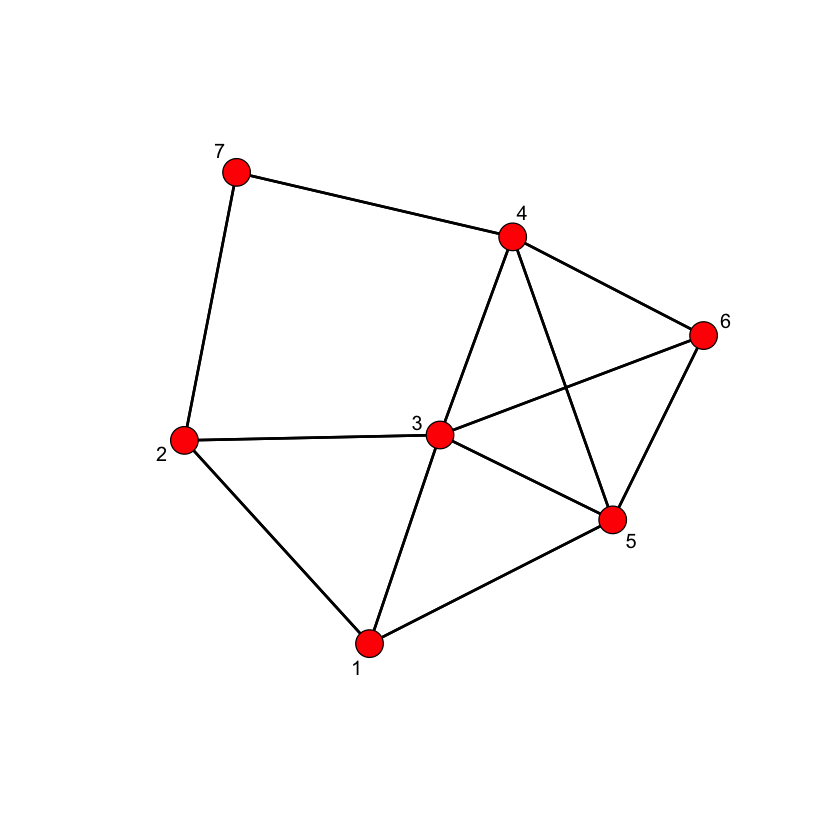

In [9]:
B <- matrix(c(
0,1,1,0,1,0,0, 
1,0,1,0,0,0,1, 
1,1,0,1,1,1,0, 
0,0,1,0,1,1,1, 
1,0,1,1,0,1,0, 
0,0,1,1,1,0,0, 
0,1,0,1,0,0,0),
nrow = 7, ncol = 7, byrow = TRUE)

# グラフの描画
gplot(B, gmode = "graph", displaylabels = TRUE)

- 上の図では頂点集合$\{1, 2, 3\}, \{1, 3, 5\}, \{3, 4, 5, 6\}$がクリークである．
    - 例えば，頂点集合{2, 3, 4, 7}は頂点3と頂点７を結ぶpathがないので，任意の頂点が隣接していないからクリークとは言えない．

### snaパッケージによるグラフからのクリークの取り出し．
- snaパッケージには，グラフからクリークを取り出すための関数`clique.census()`がある．
- 上の行列$B$で表されるグラフからクリークを取り出してみよう．

In [10]:
clique.census(B, mode = "graph")  # グラフBは無向グラフなので mode = "graph"としている．

Agg,v1,v2,v3,v4,v5,v6,v7
0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,2
2,2,1,2,0,1,0,0
1,0,0,1,1,1,1,0


### クリーク概念の拡張
- ネットワークから特異なサブグラフを取り出す指標として密度1のクリークという概念を紹介したが，いささか密度1，つまり，完全２部グラフという基準は厳しく，実問題のネットワークにも適用すると全く意味をなさないであろう．
- そこで，クリークの基準を弱めたものも考えられている．(というか，実用上はこちらが現実的)
- 今までのクリークは定義から各頂点同士の距離は1である極大サブグラフであった．これを弱めて，距離$n$以内である極大サブグラフを考えることが一般にできる．
- これを**$n-$クリーク** という．

### コミュニティ
- ネットワークの頂点数や密度はケースにより異なるので，一律の基準で適切なサブグループを定義するのは非常に困難である．
- それよりむしろ，あるネットワークの内部で相対的に密度の高い部分をサブグループとして抽出する方が実用的であり，日常的な直感にも合う．
- 相対的に高密度である事は例えば，次のように定式化できる．グラフの隣接行列を$A = (a_{ij})$とし，グラフ全体の頂点数を$n$，サブグループ$S$に属する頂点数を$n_s$とする．このとき，サブグループ$S$のcohesion (or cohesiveness)を次式で定義する:

$$
\begin{equation*}
    \frac{\frac{\sum_{i \in S} \sum_{j \in S} a_{ij}}{n_s(n_s - 1)} } {\frac{\sum_{i \in S}\sum_{j \notin S}a_{ij}}{n_s(n - n_s)}}
\end{equation*}
$$

- これは非常に分かりにくいが，よく見ると，サブグループないの頂点同士の関係密度と，サブグループ内の頂点とサブグループ外の頂点との関係密度になっていることがわかる．
- よって，この比が1より大きければ，サブグループは外部と区別可能なcohesionを持っているということを示唆する．
- このようにすると，特徴的なサブグラフが見つかるが，この方法では全ての考えられうる範囲の頂点の組む合わせを列挙していくので非効率的である．
- そこで，ここでは比較的簡単で，かつ，効率的な方法として辺の媒介中心性を用いたコミュニティ抽出方法を紹介する．
    - 辺の媒介中心性とは，点中心性としての媒介中心性の算出方法を辺に適応したものである．
    - 媒介中心性の高い辺は，それだけ多くの頂点をつなぐ働きをしていると言える．そこで，辺の媒介中心性の算出を行い，媒介中心性最大の辺を除去するという操作を繰り返すことにより，グラフを分割して，cohesionの高い**コミュニティ**と抽出しようという方法がある．

In [3]:
detach("package:sna") # snaパッケージの読み込みをキャンセルする．

In [1]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




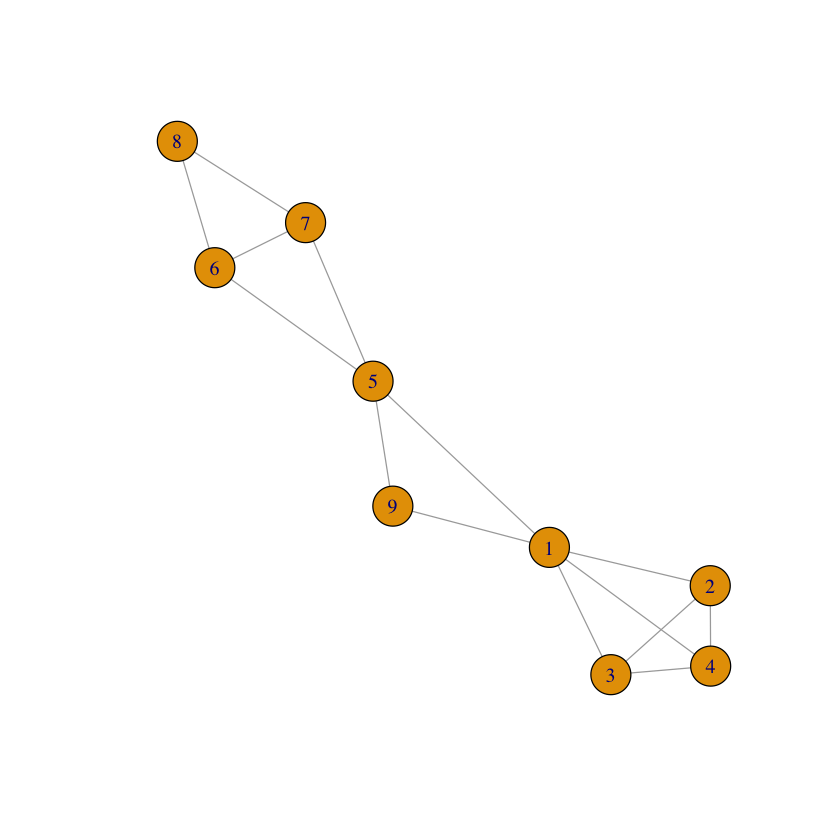

In [5]:
# 辺集合だよ
Fig5.7 <- matrix(c(
1,2,
1,3,
1,4,
1,5,
1,9,
2,3,
2,4,
3,4,
5,6,
5,7,
5,9,
6,7,
6,8,
7,8), ncol = 2, byrow = TRUE)
g3 <- graph_from_edgelist(Fig5.7, directed = FALSE)  # 辺リストをグラフで表す．またdirected = FALSEより無向グラフが得られる．
plot(g3)

In [6]:
edge_betweenness(g3, directed = FALSE)     # 辺の媒介中心性を求める

[1]  6  6  6 16  4  1  1  1  9  9  4  1  4  4

- 今回は頂点1と5を結ぶ辺の媒介中心性が16と一番高い.
- そこで，コミュニティを抽出するために，この辺を取り除いた後で，さらに媒介中心性を算出して，最大の媒介中心性を持つ辺を除去する．
- これを全ての辺が除去されるまで繰り返す．
- igraphパッケージの`cluster_edge_betweenness()`関数はこの方法でcohesionの高いコミュニティを抽出する．

In [7]:
# 凝集性(cohesion)の高いコミュニティーを抽出する．
(eb <- cluster_edge_betweenness(g3, directed = FALSE))

IGRAPH clustering edge betweenness, groups: 2, mod: 0.36
+ groups:
  $`1`
  [1] 1 2 3 4
  
  $`2`
  [1] 5 6 7 8 9
  

- 分析の結果は，頂点が1から4までのコミュニティ1と5から9までの頂点からなるコミュニティ2への2つのコミュニティへの分割が最適であることを示している．また，最適化の基準で用いられているモジュラリティ(mod)については後で述べる．
- では，どのようにして分割が得られてのかを確かめてみる．

In [27]:
eb$removed.edges     # 各ターンで除去された辺がindex順で並んでいる．

[1]  4  5 11  9 10  1  2  3  6  7  8 12 13 14

In [28]:
eb$edge.betweenness     # 各ターンで除去された辺の媒介中心性をみる

[1] 16.0 20.0  4.0  1.5  3.0  1.0  1.5  3.0  1.0  2.0  1.0  1.0  2.0  1.0

- `eb$merges` の行列は頂点が合同してコミュニティを形成していく過程を表す．

In [29]:
eb$merges

8,7
10,6
4,3
12,2
13,1
11,5
9,15
16,14


- この過程は以下のデンドログラムを見ながら辿った方がわかりやすい．

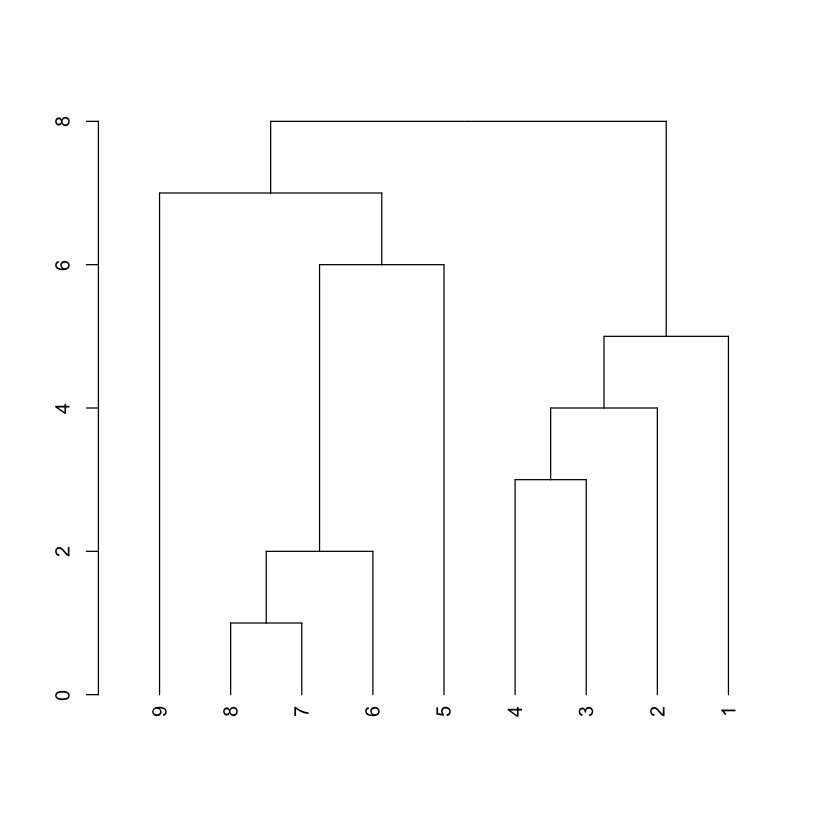

In [30]:
plot(as.dendrogram(eb))

- 行列の見方は，1行目は最初の合同(実際には最後の分割)を示しており，頂点7と頂点8が合同したことを示す．そして，それが新たに10というコミュニティになる2行目で頂点6と合同している．このように見ていくと，コミュニティが形成されていく過程がわかる．
- 上図のデンドログラムを任意のステップできればいくつかのコミュニティを得ることができる．
- しかし，どのステップで切れば良いかという基準はどのように評価すれば良いのか?
- その基準となるのが，先ほど述べた**モジュラリティ(modularity)** である．
- モジュラリティとは，分割されたコミュニティ内の辺の数とコミュニティ間の辺の数の比較により，コミュニティが高密度のサブグループをうまく抽出しているかを示す指標である．

- モジュラリティ指標であるQ値は以下のように計算される.
- グラフが$k$個のコミュニティに分割されていると仮定する．このとき，$k \times k$のコミュニティ間の関係を表す対称行列$\boldsymbol{e} = (e_{ij})$を作る．
- $e_{ij}$はコミュニティ$i$に属する頂点とコミュニティ$j$に属する頂点の間に張られる辺の数が，グラフ全体の辺に占める割合である．このときの辺の数は，辺を除去する前の元々のグラフで考える．
- 例として，上図のデンドログラムの6ステップ目での合同で形成される3つのコミュニティを例に挙げて隣接行列$\boldsymbol{e}$を作ってみる．
- コミュニティ1を{1, 2, 3, 4}, コミュニティ2を{5, 6, 7, 8}, コミュニティ3を{9}とする．
- このときの辺の数え方は，コミュニティ1からコミュニティ2への辺とコミュニティ2からコミュニティ1への辺はそれぞれ別に考えることに注意する．
    - そのため，今回の例では辺の総数は $ 14 \times 2 = 28$になることに注意せよ．
- 

## 空手クラブのネットワークを用いて実際にコミュニティを抽出してみる．

In [3]:
karate <- make_graph("Zachary")
(karate.eb <- cluster_edge_betweenness(karate))

IGRAPH clustering edge betweenness, groups: 5, mod: 0.4
+ groups:
  $`1`
   [1]  1  2  4  8 12 13 14 18 20 22
  
  $`2`
  [1]  3 25 26 28 29 32
  
  $`3`
  [1]  5  6  7 11 17
  
  $`4`
  + ... omitted several groups/vertices

- 上の結果から，5つのコミュニティに分割されていることがわかる．

In [6]:
 max(karate.eb$modularity)

[1] 0.4012985

- モジュラリティは0.4

- 各頂点が属するコミュニティのグループを調べる

In [7]:
 karate.eb$membership

[1] 1 1 2 1 3 3 3 1 4 5 3 1 1 1 4 4 3 1 4 1 4 1 4 4 2 2 4 2 2 4 4 2 4 4

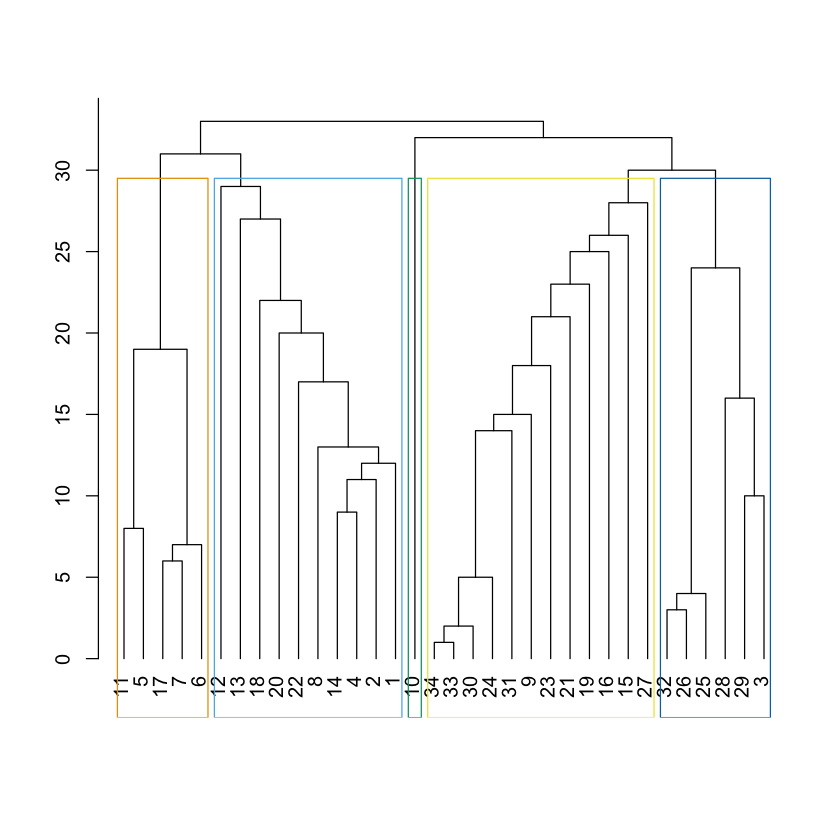

In [8]:
plot_dendrogram(karate.eb)

- ここで得られたコミュニティは，辺の媒介中心性に基づくコミュニティ抽出においてはモジュラリティを最大化する最適解であるが，考えられるすべてのグラフ分割においてモジュラリティを最大化するとは限らないことに注意せよ．
- モジュラリティを最大化するコミュニティ抽出には`cluster_optimal()`関数を使う．

In [9]:
(karate.op <- cluster_optimal(karate))

IGRAPH clustering optimal, groups: 4, mod: 0.42
+ groups:
  $`1`
   [1]  1  2  3  4  8 12 13 14 18 20 22
  
  $`2`
  [1]  5  6  7 11 17
  
  $`3`
   [1]  9 10 15 16 19 21 23 27 30 31 33 34
  
  $`4`
  + ... omitted several groups/vertices

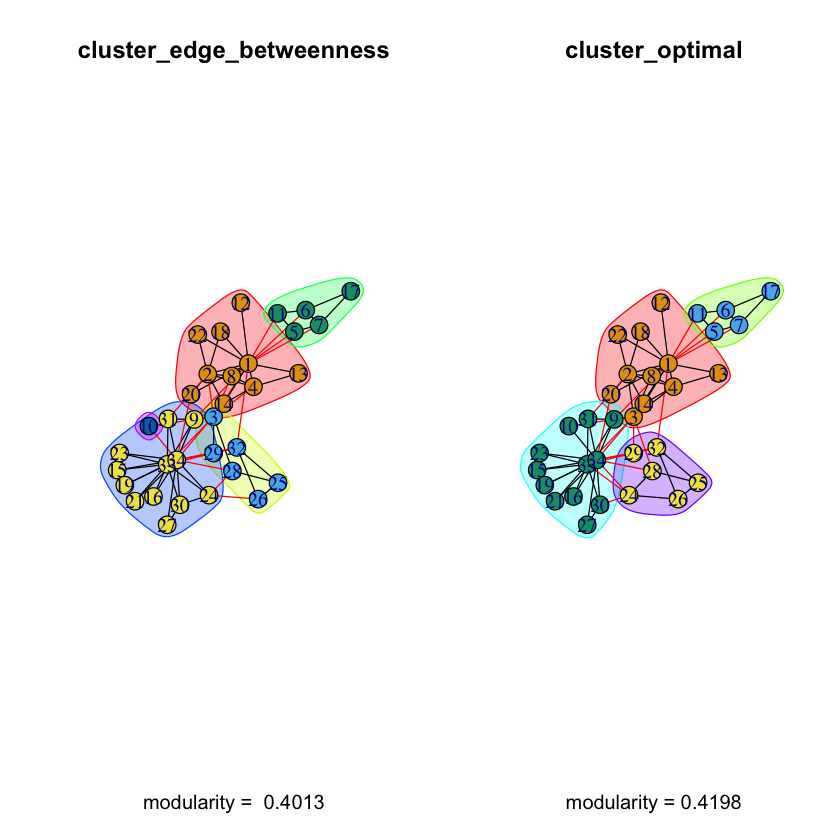

In [10]:
coord <- layout_with_fr(karate)
quartz(width = 14, height = 7)
par(mfrow = c(1, 2))
plot(karate.eb, karate, layout = coord, 
         main = "cluster_edge_betweenness", 
         xlab = paste("modularity = ", round(modularity(karate.eb), 4)))
plot(karate.op, karate, layout = coord, main = "cluster_optimal",
 xlab = paste("modularity =", round(modularity(karate.op), 4)))

In [12]:
karate.fg <- cluster_fast_greedy(karate)
karate.le <- cluster_leading_eigen(karate)
karate.lp <- cluster_label_prop(karate)
karate.ml <- cluster_louvain(karate)
karate.wt <- cluster_walktrap(karate)
karate.sg <- cluster_spinglass(karate)

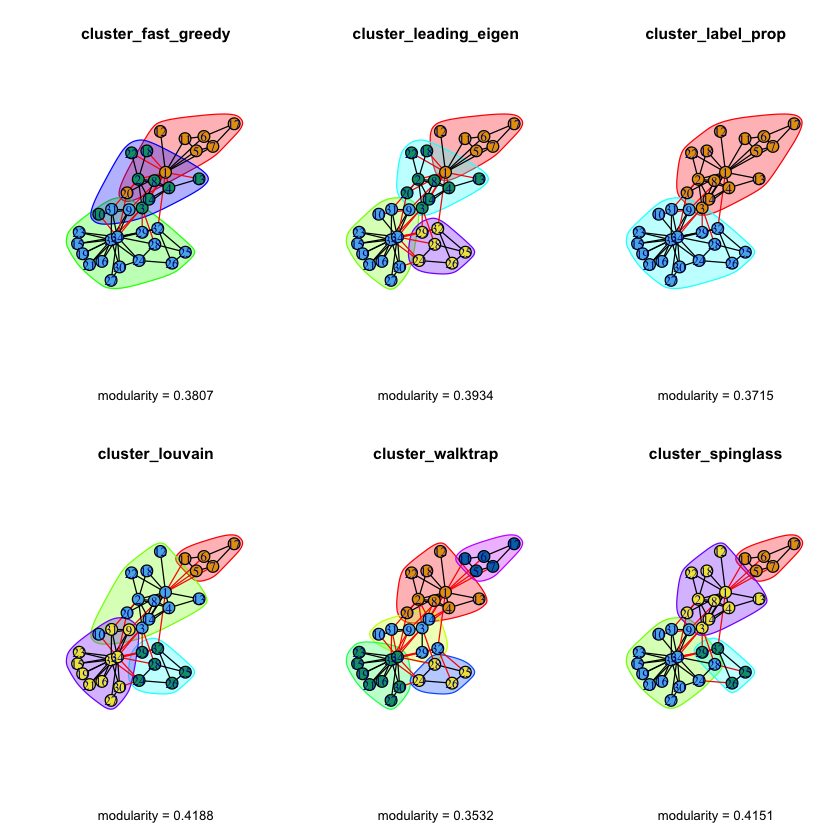

In [14]:
quartz(width = 14, height = 7)
par(mfrow = c(2,3))
plot(karate.fg, karate, layout = coord,
 main = "cluster_fast_greedy",
 xlab = paste("modularity =", round(modularity(karate.fg), 4)))
plot(karate.le, karate, layout = coord,
 main = "cluster_leading_eigen",
 xlab = paste("modularity =", round(modularity(karate.le), 4)))
plot(karate.lp, karate, layout = coord,
 main = "cluster_label_prop",
 xlab = paste("modularity =", round(modularity(karate.lp), 4)))
plot(karate.ml, karate, layout = coord,
 main = "cluster_louvain",
 xlab = paste("modularity =", round(modularity(karate.ml), 4)))
plot(karate.wt, karate, layout = coord,
 main = "cluster_walktrap",
 xlab = paste("modularity =", round(modularity(karate.wt), 4)))
plot(karate.sg, karate, layout = coord,
 main = "cluster_spinglass",
 xlab = paste("modularity =", round(modularity(karate.sg), 4)))

## リンクコミュニティ
- 先ほどまで扱ってきたコミュニティ抽出法では，1つの頂点は1つのコミュニティにのみ属するという制約があった．